## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/home/jc/project/Malaria-Detection-master/Dataset/Train'
valid_path = '/home/jc/project/Malaria-Detection-master/Dataset/Test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [6]:
folders

['Dataset/Train/Parasite', 'Dataset/Train/Uninfected']

In [7]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
from tensorflow.keras.layers import MaxPooling2D

In [11]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [15]:
training_set

In [16]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
13/13 [==============================] - 13s 969ms/step - loss: 1.3407 - accuracy: 0.5505 - val_loss: 0.7238 - val_accuracy: 0.4104
Epoch 2/5
13/13 [==============================] - 12s 897ms/step - loss: 0.5995 - accuracy: 0.6466 - val_loss: 0.6761 - val_accuracy: 0.6567
Epoch 3/5
13/13 [==============================] - 11s 874ms/step - loss: 0.5811 - accuracy: 0.6731 - val_loss: 0.9231 - val_accuracy: 0.3358
Epoch 4/5
13/13 [==============================] - 11s 880ms/step - loss: 0.4722 - accuracy: 0.7596 - val_loss: 0.8323 - val_accuracy: 0.4776
Epoch 5/5
13/13 [==============================] - 11s 883ms/step - loss: 0.4478 - accuracy: 0.7788 - val_loss: 0.9762 - val_accuracy: 0.4104


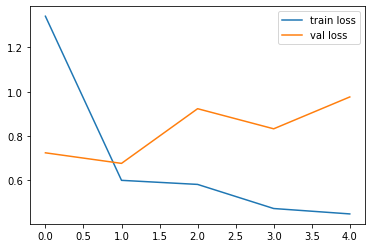

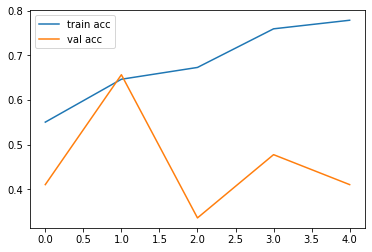

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [20]:

y_pred = model.predict(test_set)


In [21]:
y_pred

array([[0.44155988, 0.5584401 ],
       [0.53851587, 0.46148407],
       [0.48040566, 0.5195943 ],
       [0.21894307, 0.78105694],
       [0.67077947, 0.32922053],
       [0.3868604 , 0.61313957],
       [0.5256888 , 0.47431114],
       [0.3776068 , 0.6223932 ],
       [0.74885964, 0.2511404 ],
       [0.44635025, 0.5536497 ],
       [0.9793235 , 0.02067651],
       [0.7171281 , 0.2828719 ],
       [0.7579844 , 0.24201559],
       [0.50639826, 0.49360174],
       [0.26389432, 0.7361057 ],
       [0.9363991 , 0.06360083],
       [0.944074  , 0.05592604],
       [0.8834397 , 0.11656033],
       [0.38597998, 0.61402   ],
       [0.7841969 , 0.2158031 ],
       [0.8674771 , 0.13252288],
       [0.69296634, 0.30703363],
       [0.21531251, 0.78468746],
       [0.6139123 , 0.38608772],
       [0.77299947, 0.2270005 ],
       [0.2534018 , 0.7465982 ],
       [0.65436697, 0.34563303],
       [0.6720234 , 0.32797664],
       [0.82900846, 0.17099157],
       [0.80660874, 0.19339132],
       [0.

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0])

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_vgg19.h5')

In [82]:
img=image.load_img('/home/jc/project/Malaria-Detection-master/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_162922_cell_191.png',target_size=(224,224))



In [83]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [84]:
x.shape

(224, 224, 3)

In [89]:
x=x/255
x

array([[[[-0.4850196 , -0.45795685, -0.40760392],
         [-0.4850196 , -0.45795685, -0.40760392],
         [-0.4850196 , -0.45795685, -0.40760392],
         ...,
         [-0.4850196 , -0.45795685, -0.40760392],
         [-0.4850196 , -0.45795685, -0.40760392],
         [-0.4850196 , -0.45795685, -0.40760392]],

        [[-0.4850196 , -0.45795685, -0.40760392],
         [-0.4850196 , -0.45795685, -0.40760392],
         [-0.4850196 , -0.45795685, -0.40760392],
         ...,
         [-0.4850196 , -0.45795685, -0.40760392],
         [-0.4850196 , -0.45795685, -0.40760392],
         [-0.4850196 , -0.45795685, -0.40760392]],

        [[-0.4850196 , -0.45795685, -0.40760392],
         [-0.4850196 , -0.45795685, -0.40760392],
         [-0.4850196 , -0.45795685, -0.40760392],
         ...,
         [-0.4850196 , -0.45795685, -0.40760392],
         [-0.4850196 , -0.45795685, -0.40760392],
         [-0.4850196 , -0.45795685, -0.40760392]],

        ...,

        [[-0.4850196 , -0.45795685, -0

In [86]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape


(1, 224, 224, 3)

In [87]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [88]:
a=np.argmax(model.predict(img_data), axis=1)
print(a)

if a==1:
    print("Uninfected")
if a==0:
    print("Infected")

[0]
Infected


Infected
